In [2]:
# Import Libraries=
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE


In [3]:
# Load Dataset
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

print("Shape:", df.shape)
df.head()


Shape: (5110, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
# Initial Data Info
df.info()
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


In [7]:
# Missing values
df.isnull().sum()


,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [8]:
# Data cleaning
df = df.drop("id", axis=1)

df["bmi"] = df["bmi"].fillna(df["bmi"].median())

# Checking again
df.isnull().sum()


,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


In [9]:
# Encode Categorical Variables
df = pd.get_dummies(df, drop_first=True)

df.head()


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,True,False,True,False,True,False,False,True,True,False,False
1,61.0,0,0,202.21,28.1,1,False,False,True,False,False,True,False,False,False,True,False
2,80.0,0,1,105.92,32.5,1,True,False,True,False,True,False,False,False,False,True,False
3,49.0,0,0,171.23,34.4,1,False,False,True,False,True,False,False,True,False,False,True
4,79.0,1,0,174.12,24.0,1,False,False,True,False,False,True,False,False,False,True,False


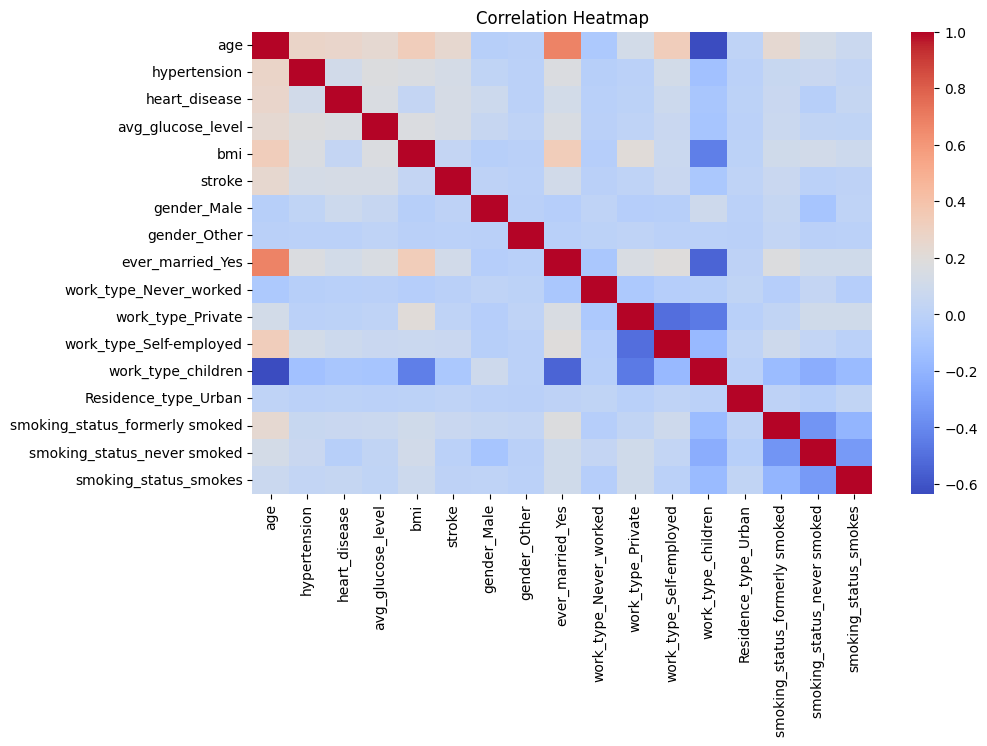

In [10]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()


In [11]:
# Define Features & Target
X = df.drop("stroke", axis=1)
y = df["stroke"]

print("Stroke cases:", sum(y))
print("Non-stroke cases:", len(y)-sum(y))


Stroke cases: 249
Non-stroke cases: 4861


In [13]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [15]:
# Model BEFORE Handling Imbalance
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("Logistic Regression BEFORE balancing")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest BEFORE balancing")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


Logistic Regression BEFORE balancing
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       972
           1       1.00      0.02      0.04        50

    accuracy                           0.95      1022
   macro avg       0.98      0.51      0.51      1022
weighted avg       0.95      0.95      0.93      1022

[[972   0]
 [ 49   1]]
Random Forest BEFORE balancing
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

[[969   3]
 [ 50   0]]


In [16]:
#  Handle Imbalance with SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

print("Class distribution AFTER SMOTE:")
print(pd.Series(y_res).value_counts())


Class distribution AFTER SMOTE:
stroke
0    3889
1    3889
Name: count, dtype: int64


In [17]:
#  Model AFTER Handling Imbalance
lr_sm = LogisticRegression(max_iter=500)
lr_sm.fit(X_res, y_res)
y_pred_sm = lr_sm.predict(X_test)

print("Logistic Regression AFTER balancing")
print(classification_report(y_test, y_pred_sm))
print(confusion_matrix(y_test, y_pred_sm))

rf_sm = RandomForestClassifier(random_state=42)
rf_sm.fit(X_res, y_res)
y_pred_rf_sm = rf_sm.predict(X_test)

print("Random Forest AFTER balancing")
print(classification_report(y_test, y_pred_rf_sm))
print(confusion_matrix(y_test, y_pred_rf_sm))


Logistic Regression AFTER balancing
              precision    recall  f1-score   support

           0       0.99      0.75      0.85       972
           1       0.14      0.80      0.24        50

    accuracy                           0.75      1022
   macro avg       0.56      0.77      0.54      1022
weighted avg       0.94      0.75      0.82      1022

[[726 246]
 [ 10  40]]
Random Forest AFTER balancing
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       972
           1       0.12      0.12      0.12        50

    accuracy                           0.91      1022
   macro avg       0.54      0.54      0.54      1022
weighted avg       0.91      0.91      0.91      1022

[[928  44]
 [ 44   6]]
